In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Knee-project

/content/drive/MyDrive/Knee-project


# Dataset Link:
https://data.mendeley.com/datasets/t9ndx37v5h/1

In [3]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import tensorflow
print(tensorflow.__version__)

2.15.0


#Data Preprocessing

In [5]:
import cv2,os
data_path='/content/drive/MyDrive/Knee-project/Knee-Dataset/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'0Normal': 0, '1Doubtful': 1, '2Mild': 2, '3Moderate': 3, '4Severe': 4}
['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']
[0, 1, 2, 3, 4]


In [6]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign  catagorical labels

In [7]:
!pip install np_utils
!pip install numpy
import numpy as np
import tensorflow as tf
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
new_label=tf.keras.utils.to_categorical(label)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=8b67ed75ab4f2ccc6d77d64ab33152fdf25d021180157eeb8ad132fa8f1fc938
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [8]:
new_label.shape

(1650, 5)

#CNN Model

In [9]:
data.shape

(1650, 256, 256, 1)

In [10]:
data.shape[1:]

(256, 256, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

# Splitting data into traning and testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

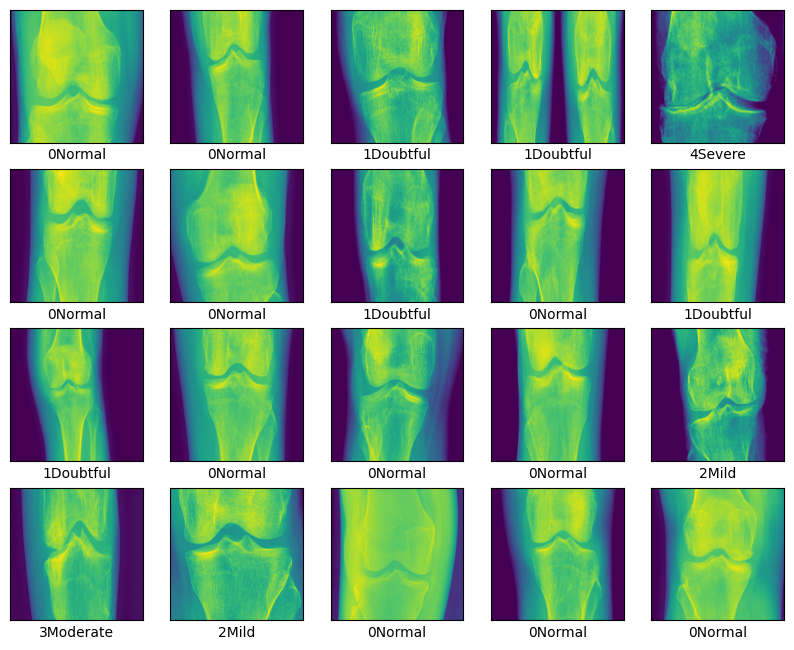

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [31]:
import time

# Record start time
start_time = time.time()

# Your model training code (history=model.fit(...))

In [32]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 7s 136ms/step - loss: 0.0284 - accuracy: 0.9924 - val_loss: 3.3952 - val_accuracy: 0.5859
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0232 - accuracy: 0.9899 - val_loss: 3.1530 - val_accuracy: 0.5825
Epoch 3/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 3.5263 - val_accuracy: 0.5859
Epoch 4/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0209 - accuracy: 0.9916 - val_loss: 3.5678 - val_accuracy: 0.5758
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0181 - accuracy: 0.9933 - val_loss: 3.5136 - val_accuracy: 0.5892
Epoch 6/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0226 - accuracy: 0.9916 - val_loss: 3.5529 - val_accuracy: 0.5791
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 3.4418 - val_accuracy: 0.6061

In [33]:
# Record end time
end_time = time.time()

In [34]:
model.save('model.h5')

In [35]:
from matplotlib import pyplot as plt

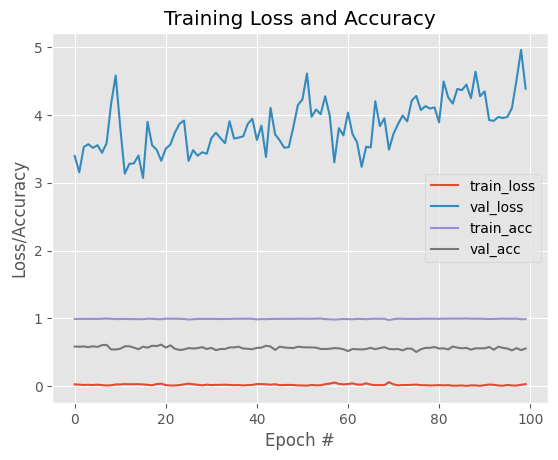

In [36]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [37]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 4.0918121337890625 %
test accuracy: 0.5151515007019043 %


1/1 [==============================] - 0s 88ms/step
A.I predicts: 1Doubtful
Correct prediction for label 4 is 4Severe


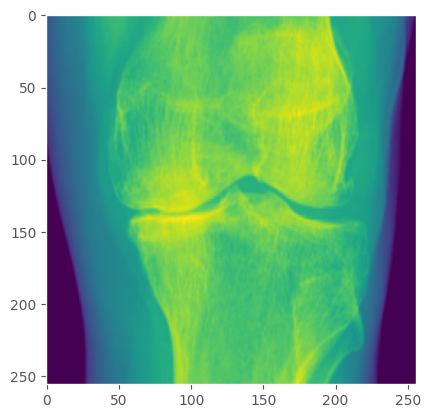

In [38]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

6/6 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

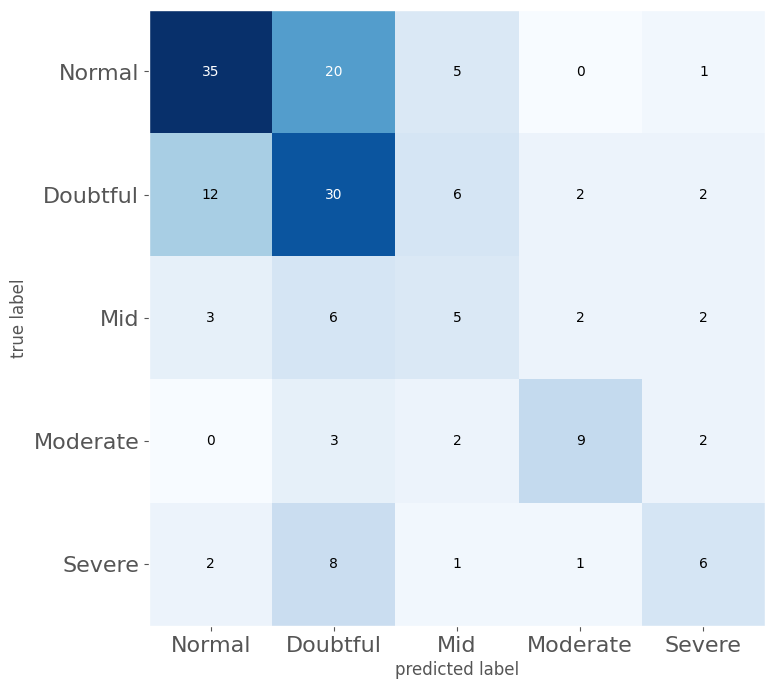

In [39]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

In [40]:
# After model training (history=model.fit(...))
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 98.82%


In [41]:
# Calculate elapsed time
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds")

Training completed in 506.38 seconds


In [42]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#1. Authenticate and create the PyDrive Client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Save keras Model or weights on google drive
model_file=drive.CreateFile({'title':'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

#download to google drive
drive.CreateFile({'id':model_file.get('id')})

#create on Colab Directory
model.save_weights('modelweights.h5')
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://6thdv8yuapg-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
from flask import Flask, render_template, request
from keras.models import load_model
from keras.preprocessing import image
import cv2
import numpy as np
import os

app = Flask(__name__)

dic = {0: 'Normal', 1: 'Doubtful', 2: 'Mild', 3: 'Moderate', 4: 'Severe'}

img_size = 256
model = load_model('model.h5')
model.make_predict_function()

def predict_label(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (img_size, img_size))
    i = image.img_to_array(resized) / 255.0
    i = i.reshape(1, img_size, img_size, 1)
    p = np.argmax(model.predict(i), axis=-1)
    return dic[p[0]]

@app.route("/", methods=['GET', 'POST'])
def main():
    return render_template("band.html")

@app.route("/about")
def about_page():
    return "Diagnosis of Knee arthritis!"

@app.route("/predict", methods=['POST'])
def upload():
    if request.method == 'POST':
        if 'file' not in request.files:
            return "No file part"
        img = request.files['file']
        if img.filename == '':
            return "No selected file"
        img_path = os.path.join("uploads", img.filename)
        img.save(img_path)
        try:
            p = predict_label(img_path)
            return str(p).lower()
        except Exception as e:
            return f"Error: {str(e)}"

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
